# Logistic Regression

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
titanic_data=pd.read_csv('train_clean.csv')
titanic_data.sample(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
359,22.0,NaN,Q,7.8792,"Mockler, Miss. Helen Mary ""Ellie""",0,360,3,female,0,1,330980,Miss,0
424,18.0,NaN,S,20.2125,"Rosblom, Mr. Viktor Richard",1,425,3,male,1,0,370129,Mr,2
529,23.0,NaN,S,11.5000,"Hocking, Mr. Richard George",1,530,2,male,2,0,29104,Mr,3
80,22.0,NaN,S,9.0000,"Waelens, Mr. Achille",0,81,3,male,0,0,345767,Mr,0
782,29.0,D6,S,30.0000,"Long, Mr. Milton Clyde",0,783,1,male,0,0,113501,Mr,0


In [3]:
print('Passenger count = ',len(titanic_data.index))

Passenger count =  891


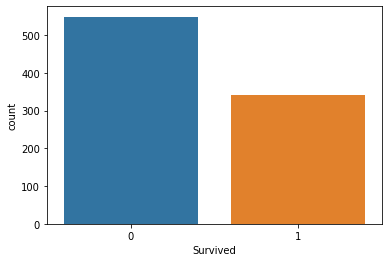

In [5]:
sns.countplot(x='Survived',data=titanic_data)

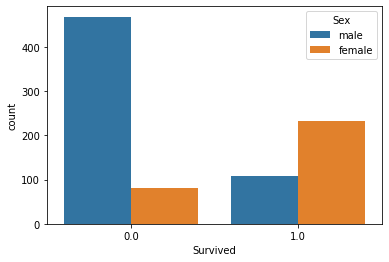

In [5]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

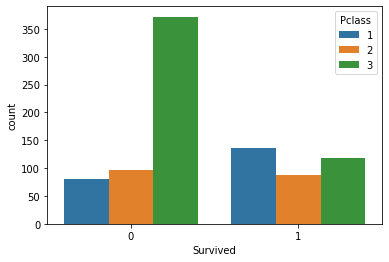

In [6]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

In [7]:
titanic_data.isnull().any()

Age            False
Cabin           True
Embarked       False
Fare           False
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived       False
Ticket         False
Title          False
Family_Size    False
dtype: bool

In [8]:
titanic_data['Cabin'].isnull().sum()

687

In [9]:
#titanic_data.dropna(inplace=True)

In [10]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [11]:
titanic_data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [14]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True) #drop_first=True  One column is enough. 
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [15]:
embarked=pd.get_dummies(titanic_data['Embarked'],drop_first=True)    
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [16]:
titanic_data=pd.concat([titanic_data,sex,embarked],axis=1)

In [17]:
titanic_data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size,male,Q,S
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1,1,0,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1,0,0,0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,0,0,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1,0,0,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0,1,0,1


In [18]:
titanic_data=titanic_data.drop(['Embarked','Fare','Sex','Ticket','PassengerId','Title','Name'],axis=1)

In [19]:
x=titanic_data.drop(['Survived'],axis=1)
y=titanic_data.Survived

In [20]:
from sklearn.model_selection import train_test_split #cross_validation
from sklearn.linear_model import LogisticRegression

In [21]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\KRISHNA PRASAD P\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
pred=model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [25]:
accuracy_score(y_test,pred)

0.8435754189944135

In [26]:
confusion_matrix(y_test,pred)

array([[107,  14],
       [ 14,  44]], dtype=int64)

# Feature scaling is a method used to normalize the range of independent variables or features of data.

The standard score of a sample x is calculated as:
            z=(x-u)/s 
where 

u-mean of the training samples or zero if with_mean=False
s-standard deviation of the training samples or one if with_std=False.